### What are cosine sim plot to compliment cross decoding for pref/not-pref using sub-pops?

In [19]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.single_selected_feature_configs import *
import scipy
import argparse
import copy
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='Time_y', ylabel='Time_x'>

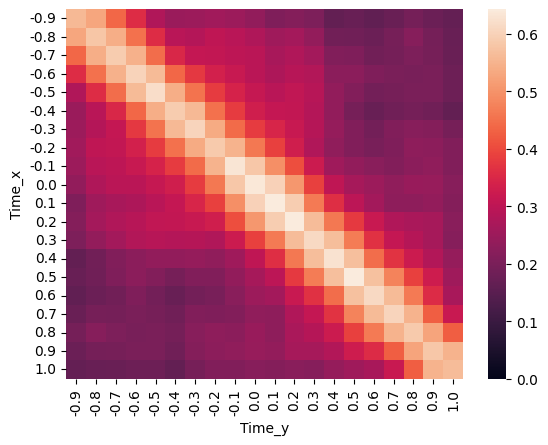

In [28]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"

# res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()

models = io_utils.read_selected_features_models(args, FEATURES, "pref_vs_not_pref")
weights = io_utils.get_selected_features_weights(models)
cosine_sims = classifier_utils.get_cross_time_cosine_sim_of_weights(weights)
sns.heatmap(cosine_sims, ax=ax, vmin=0)
# axs[i].set_title(cond)


<Axes: xlabel='Time_y', ylabel='Time_x'>

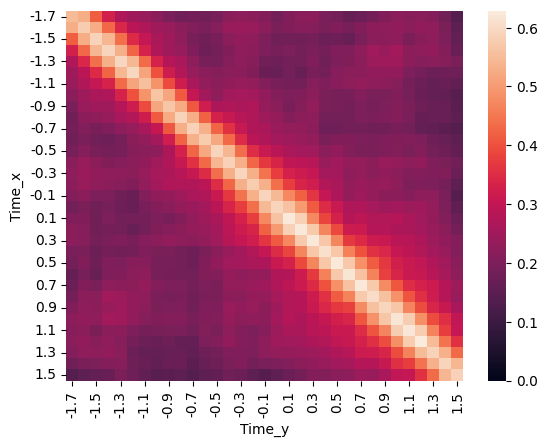

In [29]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.beh_filters = {"Response": "Correct", "PreferredChosen": True}
args.shuffle_method = "session_permute"
args.sig_unit_level = "95th_all_time"
args.trial_event = "FeedbackOnsetLong"

# res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])

fig, ax = plt.subplots()

models = io_utils.read_selected_features_models(args, FEATURES, "pref_vs_not_pref")
weights = io_utils.get_selected_features_weights(models)
cosine_sims = classifier_utils.get_cross_time_cosine_sim_of_weights(weights)
sns.heatmap(cosine_sims, ax=ax, vmin=0)
# axs[i].set_title(cond)


### What should baseline be here? 
- Different features have different # of neurons, diff dims 
- Plotting average cosine sim across features, averaging across runs, feats
- null: generate same data 1000 times, randomly drawing vectors

In [24]:
stimonset_units = pd.read_pickle("/data/patrick_res/firing_rates/SA/StimOnset_pref_95th_all_time_units.pickle")
stimonset_units = stimonset_units.groupby("feat").PseudoUnitID.nunique().to_dict()

In [25]:
num_shuffle = 1000
num_runs = 8

def random_vector(n):
    vec = np.random.normal(0, 1, n)  # Generate random numbers from normal distribution
    return vec

avg_cosin_sims = []
for i in tqdm(range(num_shuffle)):
    avg_cosine_sim = []
    for feat in FEATURES: 
        n = stimonset_units[feat]
        for run_x in range(num_runs):
            for run_y in range(num_runs):
                if run_x != run_y:
                    sim = classifier_utils.cosine_sim(random_vector(n), random_vector(n))
                    avg_cosine_sim.append(sim)
    avg_cosin_sims.append(np.mean(avg_cosine_sim))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:06<00:00, 166.33it/s]


In [27]:
np.percentile(avg_cosin_sims, 99)

0.016642164876774255